# EXPLORATORY DATA ANALYSIS

## Data Loading and Inspection

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Loading Dataset 

In [3]:
# loading heart_data dataset with pandas
data_path = "heart_data.csv"
df = pd.read_csv(data_path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### Inspecting Dataset

In [5]:
# Displaying basic information about the dataset
print("\n Basic Info about dataset\n")
df.info()

# Displaying first 10 rows of dataset
print("\n First 10 row of dataset \n")
print(f"{df.head(10)}\n")

# Descriptive Statistics about dataset

print("\n Statistical Description of dataset \n")
print(f"{df.describe()}\n")

print("\n Categorical Description of dataset \n")
df.describe(include = "object")


 Basic Info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    float64
 1   sex            303 non-null    float64
 2   cp             303 non-null    float64
 3   trestbps       303 non-null    float64
 4   chol           303 non-null    float64
 5   fbs            303 non-null    float64
 6   restecg        303 non-null    float64
 7   thalach        303 non-null    float64
 8   exang          303 non-null    float64
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    float64
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB

 First 10 row of dataset 

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpe

,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


In [7]:
# Checking for null values in all columns
df.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64

### Data Cleaning

In [9]:
# Checking for misrepresented data in each column

# Viewing unique values in object-type columns for potential conversion or inspection

for column in df.select_dtypes(include =['object']).columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':{unique_values}")

Unique values in 'ca':['0.0' '3.0' '2.0' '1.0' '?']
Unique values in 'thal':['6.0' '3.0' '7.0' '?']


In [11]:
# Replacing '?' with NaN in the 'ca' and 'thal' columns
df['ca'] = df['ca'].replace('?', np.NaN).astype(float)
df['thal'] = df['thal'].replace('?', np.NaN).astype(float)

In [13]:
# Checking for missing values
print(f"\n Missing Values: \n\n{df.isnull().sum()}\n")

# #Checking for duplicates
print(f"\n Duplicate Values: \n\n{df.duplicated().sum()}\n")


 Missing Values: 

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               4
thal             2
heart_disease    0
dtype: int64


 Duplicate Values: 

0



In [15]:
# Replacing missing valus for 'ca' and 'thal' with the mode
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

In [17]:
# Checking for missing values after replacing missing values with mode
print(f"\n Missing Values: \n\n{df.isnull().sum()}\n")


 Missing Values: 

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart_disease    0
dtype: int64



## Univariate Analysis

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'heart_disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

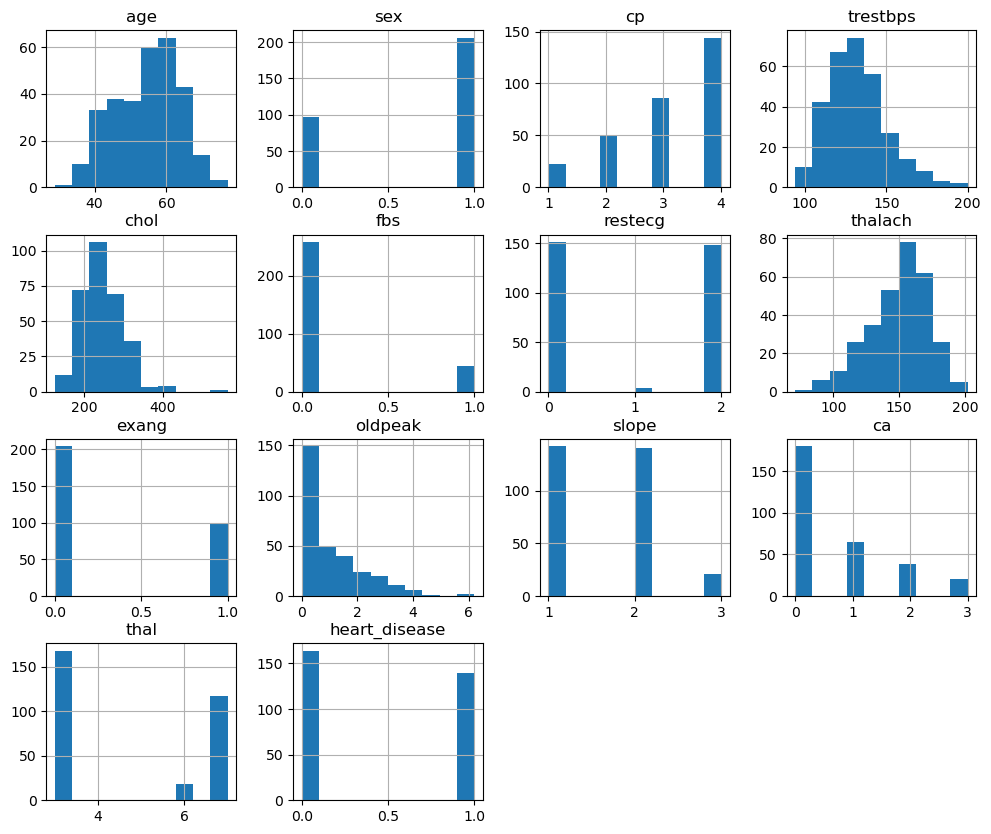

In [40]:
df.hist(figsize = (12, 10))

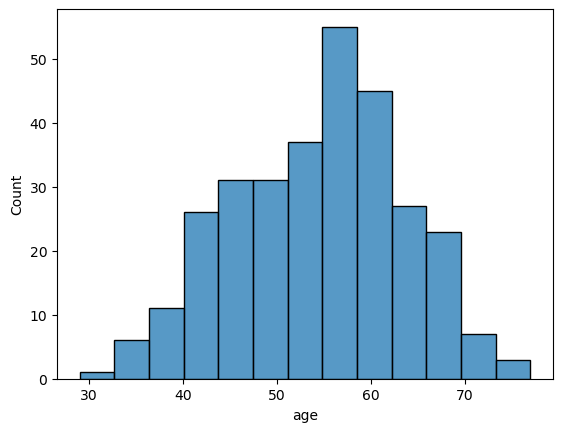

In [32]:
# Visualizing the age distribution
sns.histplot(x ='age', data =df)
plt.show()

## Converting the heart_disease to be categorica

Heart_disease: diagnose of heart diseaset(angiographic disease status) 
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing "This field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0)."

The heart_disease to be in 0 and 1 Where 0 = no heart disease and 1 = heart disease

In [26]:
df['heart_disease'].replace({2:1, 3:1, 4:1})

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: heart_disease, Length: 303, dtype: int64

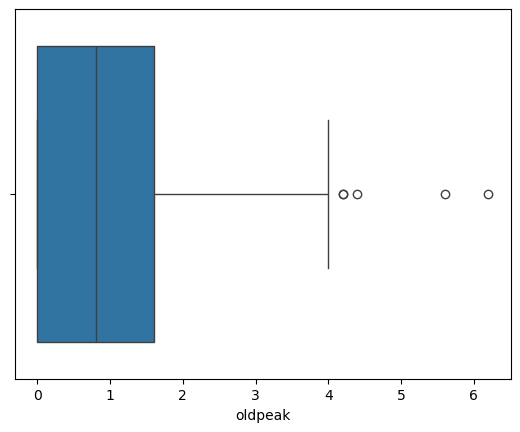

In [48]:
# Visualizing the oldpeak column
sns.boxplot(x = 'oldpeak', data=df)
plt.show()

<Axes: xlabel='sex', ylabel='heart_disease'>

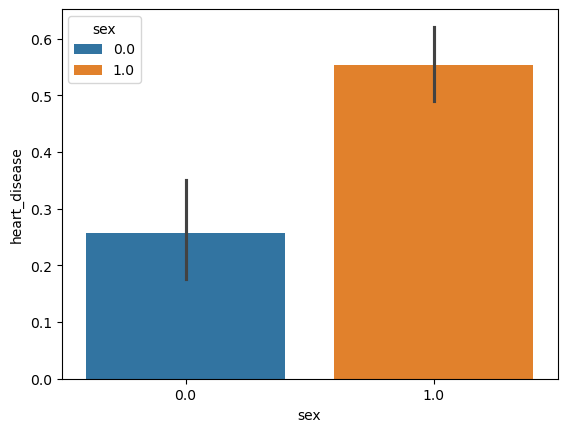

In [50]:
# Analyzing Categorical Values
sns.barplot(x='sex', y='heart_disease', legend='auto', hue='sex', data=df)


<Axes: xlabel='slope', ylabel='oldpeak'>

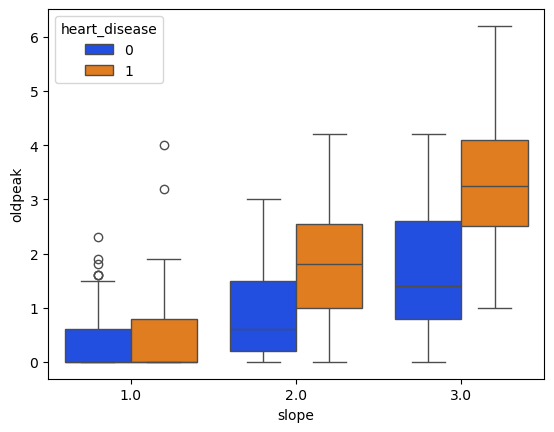

In [54]:
# Ploting slope and oldpeak with labels as
sns.boxplot(x='slope', y= 'oldpeak', legend='auto', hue='heart_disease', palette='bright', data =df)

## Task 4: Bivariate Analysis

### Numerical-Numerical Relationships: The relationship between age and thalach

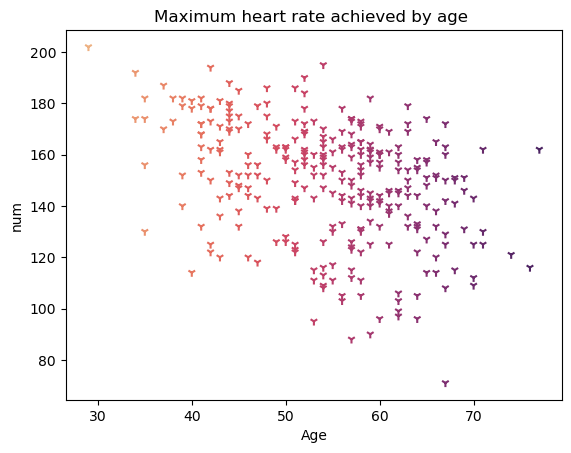

In [65]:
# Scatterplot to explore relationships in numerical columns
plt.scatter(df['age'],
            df['thalach'],
            marker="1",
            c=df['age'],
            cmap='flare')
plt.xlabel("Age")
plt.ylabel("num")
plt.title("Maximum heart rate achieved by age ")
plt.show()
            

In [69]:
#Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.424510


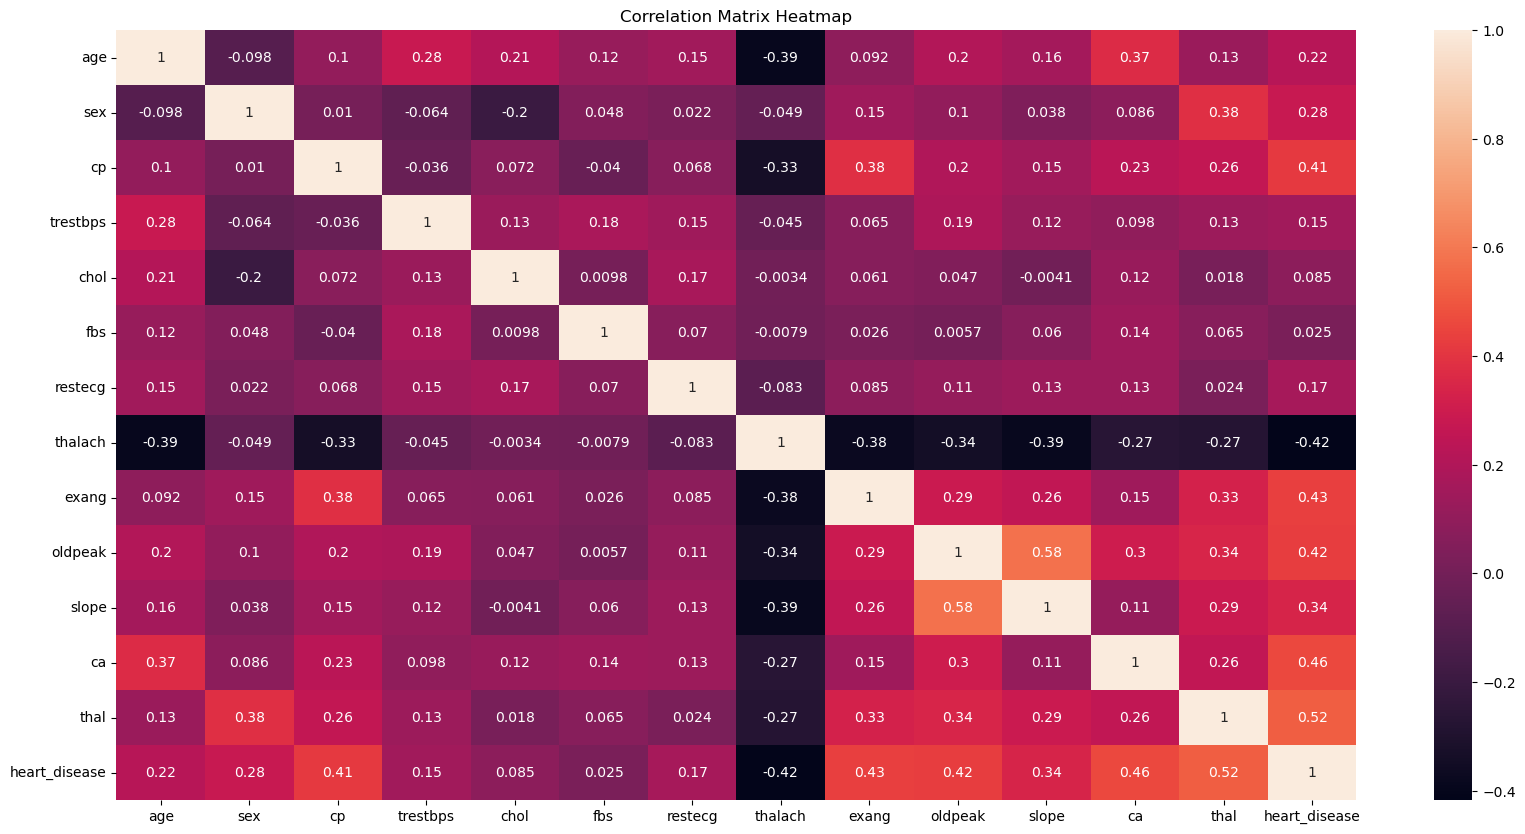

In [73]:
# Ploting the correlation matrix on a heatmap
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

### Categorical-Numerical Relationships

<Axes: xlabel='heart_disease', ylabel='chol'>

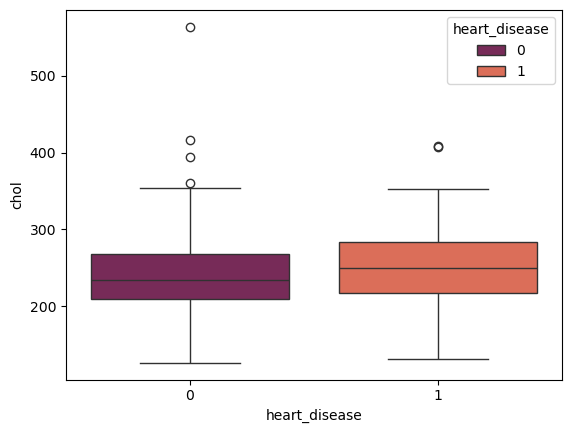

In [80]:
# Ploting the heart_disease vesus the chol
sns.boxplot(
    x='heart_disease',
    y='chol',
    hue='heart_disease',
    palette="rocket",
    data = df
)

In [82]:
# Crosstap to explore the categorical columns
con = pd.crosstab(df['sex'], df['heart_disease'])
con

heart_disease,0,1
sex,,
0.0,72,25
1.0,92,114


This shows there is a chance of a male getting a heart disease than a female

## Multivariate Analysis

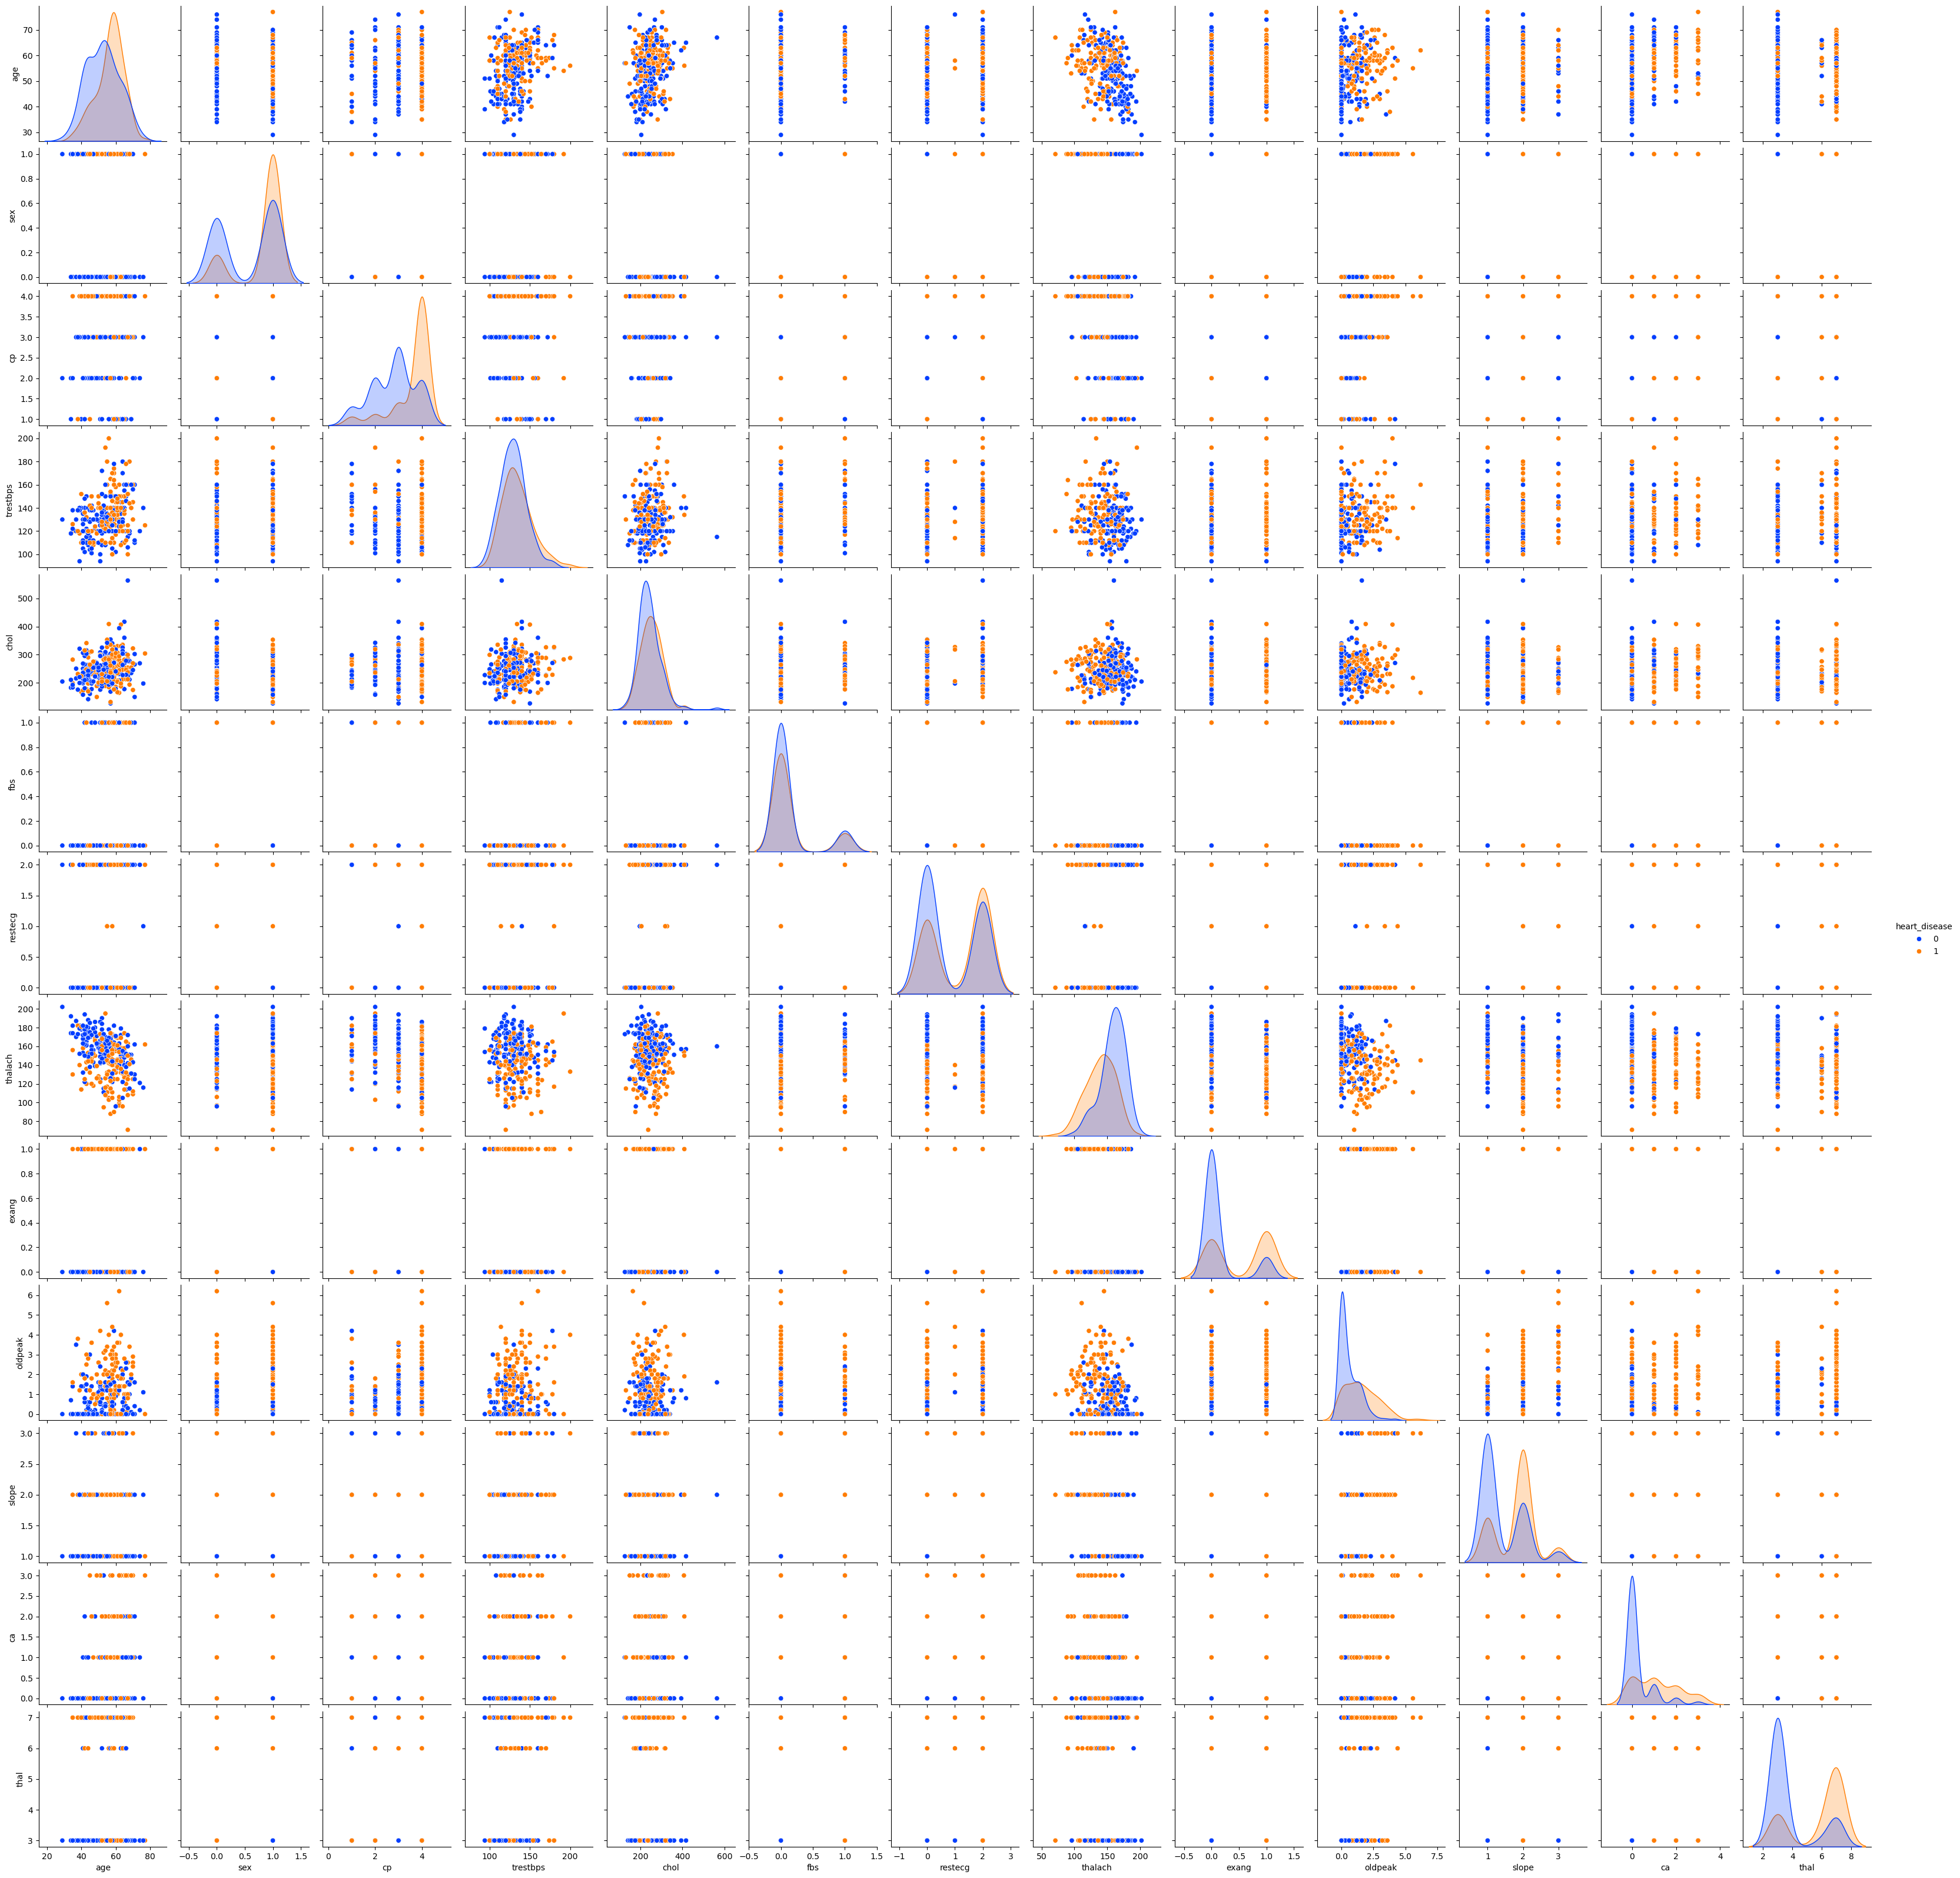

In [89]:
# Using pairplots to visualize multiple relationship
sns.pairplot(data=df, hue ='heart_disease', palette = 'bright')